In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import scipy as sp

## 问题1

Continuous-Time Random Walk and Opinion Dynamics

The first problem of this homework is divided into two parts. The initial part focuses on analyzing the behavior of a single particle performing a continuous-time random walk in a network. The network is represented by the graph G, as shown in Figure 1, with nodes labeled o, a, b, c, and d. The particle’s movement
between nodes is governed by the transition rate matrix Λ, as described below:

In [3]:
# 先建立可达矩阵
lambda_matrix = np.array([[0,2/5,1/5,0,0],
                         [0,0,3/4,1/4,0],
                         [1/2,0,0,1/3,0],
                         [0,0,1/3,0,2/3],
                         [0,1/2,0,1/3,0]]
                        )

# 定义节点名称列表
node = ['o', 'a', 'b', 'c', 'd']
# 创建有向图
G = nx.DiGraph()
# 添加节点
G.add_nodes_from(node)
# 添加边和权重
for i in range(len(node)):
    for j in range(len(node)):
        if lambda_matrix[i][j] > 0:
            G.add_edge(node[i], node[j], weight=lambda_matrix[i][j])

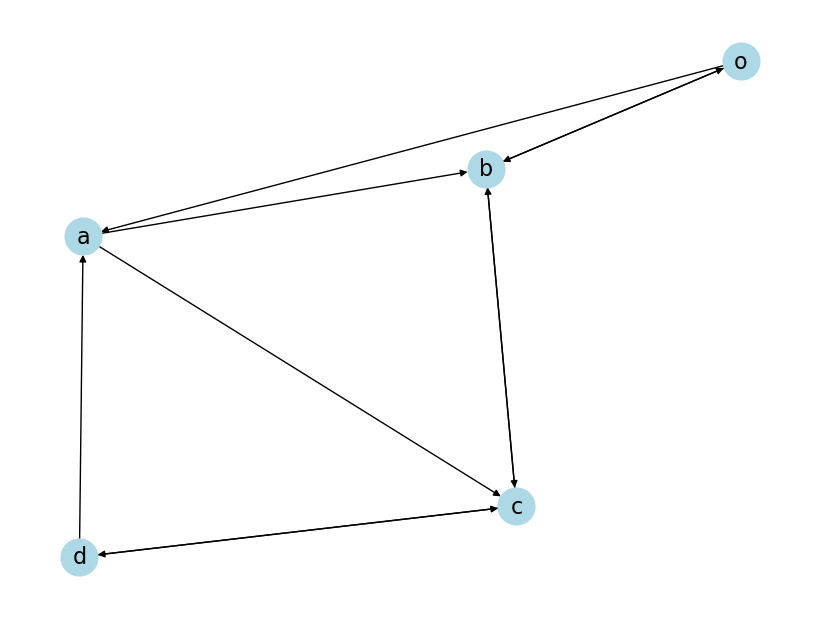

In [4]:
# 绘制有向图
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # 使用 spring 布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=16, font_color='black', arrows=True)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=14)
plt.axis('off')  # 关闭坐标轴
plt.show()

## task1

problem1

Compute the average time it takes for a particle starting at node a to leave the node and then return to it, using simulations.

In [5]:
# 计算从节点a的离开速率
lambda_a = sum(lambda_matrix[1, :])  # 节点a的索引是1
print(f"从节点a的离开速率 λ_a = {lambda_a}")

# 计算从a可以转移到的节点及其概率
print(f"\n从节点a可以转移到的节点:")
transition_probs = lambda_matrix[1, :] / lambda_a
for i, prob in enumerate(transition_probs):
    if prob > 0:
        print(f"到节点 {node[i]}: 概率 = {prob:.4f} (速率 = {lambda_matrix[1, i]})")

# 计算在节点a的平均停留时间
mean_stay_time = 1 / lambda_a
print(f"\n在节点a的平均停留时间 = {mean_stay_time:.4f}")

从节点a的离开速率 λ_a = 1.0

从节点a可以转移到的节点:
到节点 b: 概率 = 0.7500 (速率 = 0.75)
到节点 c: 概率 = 0.2500 (速率 = 0.25)

在节点a的平均停留时间 = 1.0000


In [6]:
def simulate_single_return_time():
    """
    模拟从节点a开始，离开后再返回的单次时间
    返回：总的返回时间
    """
    total_time = 0
    current_node_idx = 1  # 从节点a开始（索引为1）
    
    # 第一步：从节点a离开
    # 计算在节点a的停留时间
    stay_time = np.random.exponential(1 / lambda_a)
    total_time += stay_time
    
    # 选择下一个节点
    transition_probs = lambda_matrix[1, :] / lambda_a
    next_node_idx = np.random.choice(len(node), p=transition_probs)
    current_node_idx = next_node_idx
    
    # 第二步：随机游走直到返回节点a
    while current_node_idx != 1:  # 直到回到节点a（索引为1）
        # 计算当前节点的离开速率
        current_lambda = sum(lambda_matrix[current_node_idx, :])
        
        # 生成停留时间
        stay_time = np.random.exponential(1 / current_lambda)
        total_time += stay_time
        
        # 选择下一个节点
        transition_probs = lambda_matrix[current_node_idx, :] / current_lambda
        next_node_idx = np.random.choice(len(node), p=transition_probs)
        current_node_idx = next_node_idx
    
    return total_time

# 测试函数
return_time = simulate_single_return_time()
print(f"单次返回时间: {return_time:.4f}")

单次返回时间: 2.8348


In [7]:
def simulate_average_return_time(num_simulations=10000):
    """
    模拟多次返回时间并计算平均值
    """
    return_times = []
    
    for i in range(num_simulations):
        return_time = simulate_single_return_time()
        return_times.append(return_time)
        
        # # 每1000次显示进度
        # if (i + 1) % 1000 == 0:
        #     print(f"已完成 {i + 1}/{num_simulations} 次模拟")
    
    return_times = np.array(return_times)
    
    print(f"\n=== 模拟结果 ===")
    print(f"模拟次数: {num_simulations}")
    print(f"平均返回时间: {np.mean(return_times):.4f}")
    print(f"标准差: {np.std(return_times):.4f}")
    print(f"最小值: {np.min(return_times):.4f}")
    print(f"最大值: {np.max(return_times):.4f}")
    
    return return_times

# 运行模拟
return_times = simulate_average_return_time(10000)


=== 模拟结果 ===
模拟次数: 10000
平均返回时间: 6.0935
标准差: 4.3015
最小值: 0.1447
最大值: 40.0317


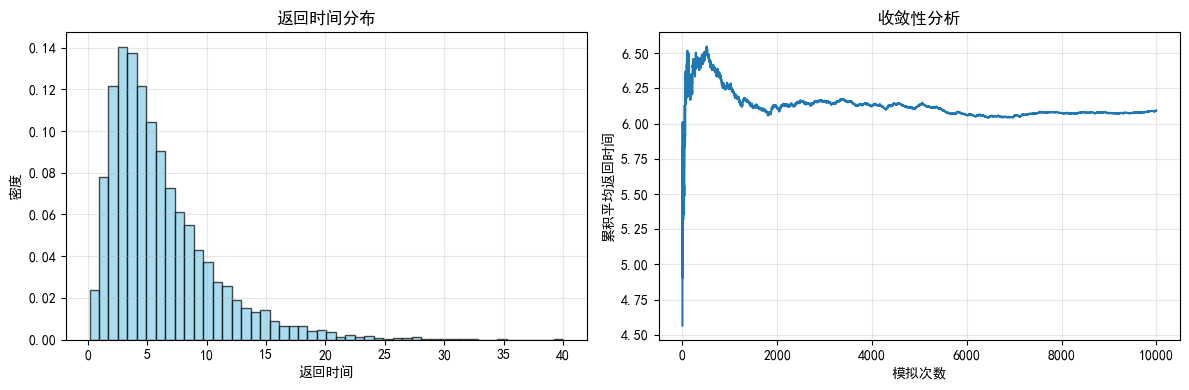

In [8]:
# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制返回时间分布
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(return_times, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('返回时间')
plt.ylabel('密度')
plt.title('返回时间分布')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(return_times) / np.arange(1, len(return_times) + 1))
plt.xlabel('模拟次数')
plt.ylabel('累积平均返回时间')
plt.title('收敛性分析')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

标准答案：

1.全局时钟均匀化

$\omega_i = \sum_{j \neq i} \lambda_{ij}$ 是节点 $i$ 的离开速率

$\omega^* = \max_i \omega_i$ 是全局最大离开速率

关键洞察：要将所有节点的离开速率"标准化"到相同的值 $\omega^*$

2.原始CTMC的生成矩阵

$$Q_{ij} = \begin{cases} \lambda_{ij} & \text{if } i \neq j\\ 
\ -\omega_i & \text{if } i = j\end{cases}$$

均匀化后的转移概率矩阵

$$ \bar{P}_{ij} = \begin{cases} \frac{\lambda_{ij}}{\omega^*} & \text{if } i \neq j 
\\ 1 - \frac{\omega_i}{\omega^*} & \text{if } i = j \end{cases}$$

In [9]:
# Transition rate matrix
Lambda = np.array([
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/2, 0, 1/3, 0]
])

# Nodes and their indices
nodes = ['o', 'a', 'b', 'c', 'd']
node_indices = {node: idx for idx, node in enumerate(nodes)}
inv_node_indices = {v: k for k, v in node_indices.items()}
# Compute global Poisson clock rate omega_star
omega = np.sum(Lambda, axis=1) # 计算每个节点的总离开速率，按列求和
omega_star = np.max(omega)

# Compute transition probability matrix P_bar
P_ij = Lambda/omega_star 
P_ii = np.diag(np.ones(len(omega))-np.sum(P_ij,axis=1))
P_bar = P_ij + P_ii

In [10]:
np.diag(np.ones(len(omega)))

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [11]:
P_ij

array([[0.        , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.5       , 0.        , 0.33333333, 0.        ]])

In [12]:
P_ii

array([[0.4       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.16666667, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16666667]])

In [13]:
P_bar

array([[0.4       , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.16666667, 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.5       , 0.        , 0.33333333, 0.16666667]])

In [29]:
def get_particle_simulation_time(source, target, num_simulations=10000):
    transition_times = []
    
    for _ in range(num_simulations):
        current_node = node_indices[source]
        cumulative_time = 0.0
        
        while True:
            # 全局泊松时钟
            t_next = -np.log(np.random.rand()) / omega_star
            cumulative_time += t_next
            
            # 根据P_bar进行状态转移
            next_node = np.random.choice(len(P_bar), p=P_bar[current_node, :])
            current_node = next_node
            
            # 检查是否返回目标节点
            if current_node == node_indices[target]:
                transition_times.append(cumulative_time)
                break
    
    return np.mean(transition_times)

print("Simulated average return time on node a:", get_particle_simulation_time('a', 'a'))

Simulated average return time on node a: 6.1110100953645095


## task2

Compare the simulated return time to the theoretical return time $E_{a}[T_{a}^{+}]$.

In [18]:
### Compute the theoretical return-time Ea[Ta]
def compute_stationary_distribution(P):
    values, vectors = np.linalg.eig(P.T)
    index = np.argmax(values.real)  # Dominant eigenvalue (close to 1)
    pi = vectors[:, index].real
    pi = pi / np.sum(pi)  # Normalize to get probabilities
    return pi

pi_bar =  compute_stationary_distribution(P_bar)

# Theoretical return-time for node 'a'
node_a = node_indices['a']
E_a_T_a = 1 / (omega[node_a] * pi_bar[node_a])

print("Theoretical return-time Ea[T_a+]:", E_a_T_a)

Theoretical return-time Ea[T_a+]: 6.0588235294117645


In [26]:
### Simulate many retun-times
simulation_value_list = []
num_simulations_list = range(100, 10000, 200)
for num in num_simulations_list:
    simulation_value_list.append(get_particle_simulation_time(num_simulations=num))

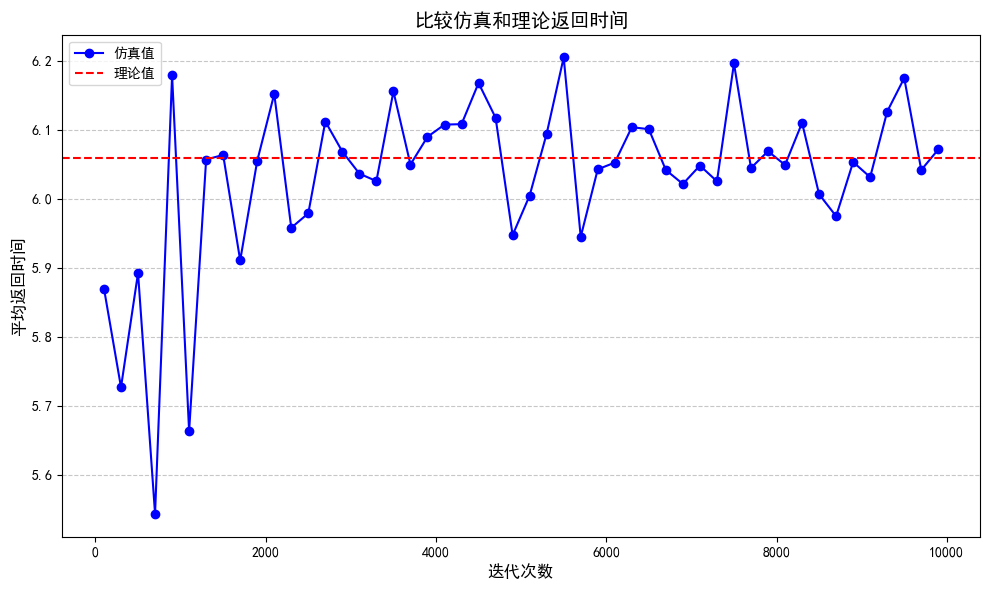

In [27]:
### Plot the simulation results and compare with the theoretical value
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.figure(figsize=(10, 6))
plt.plot(num_simulations_list, simulation_value_list, label='仿真值', marker='o', linestyle='-', color='blue')
plt.axhline(y=E_a_T_a, color='red', linestyle='--', label='理论值')

# Add labels, legend, and title
plt.xlabel('迭代次数', fontsize=12)
plt.ylabel('平均返回时间', fontsize=12)
plt.title('比较仿真和理论返回时间', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## task3
Simulated Hitting Time from Node o to Node d

In [28]:
### Hitting time simulation using global Poisson clock
simulated_hitting_time = get_particle_simulation_time(source='o', target='d')
print("Simulated average return time from node o to node d:", simulated_hitting_time)

Simulated average return time from node o to node d: 10.674739789268184


## task4

Comparison Between Simulated and Theoretical Hitting Times

In [30]:
# Compute the theoretical hitting time Eo[Td]
# 设置目标节点
target_node = node_indices['d']
# 从转移矩阵P_bar中移除目标节点
p_reduced = np.delete(np.delete(P_bar, target_node, axis=0),  target_node, axis=1)
# 求解排除目标节点后的线性方程组从而计算理论击中时间
n = p_reduced.shape[0]
I = np.eye(n)
b = np.ones(n)  / omega_star
# 计算排除目标节点d后的所有节点的理论击中时间
h_reduced = np.linalg.solve(I - p_reduced, b)
# 插入目标节点的理论击中时间为0(因为目标节点不需要时间到达)
h = np.insert(h_reduced, target_node, 0)
# 计算从节点o到节点d的理论击中时间
E_o_T_d = h[node_indices['o']]
print("Theoretical hitting time Eo[Td]:", E_o_T_d)

Theoretical hitting time Eo[Td]: 10.766666666666666


In [31]:
### Simulate many hitting-times
simulation_value_list = []
num_simulations_list = range(100, 10000, 200)
for num in num_simulations_list:
    simulation_value_list.append(get_particle_simulation_time(source='o', target='d',num_simulations=num))

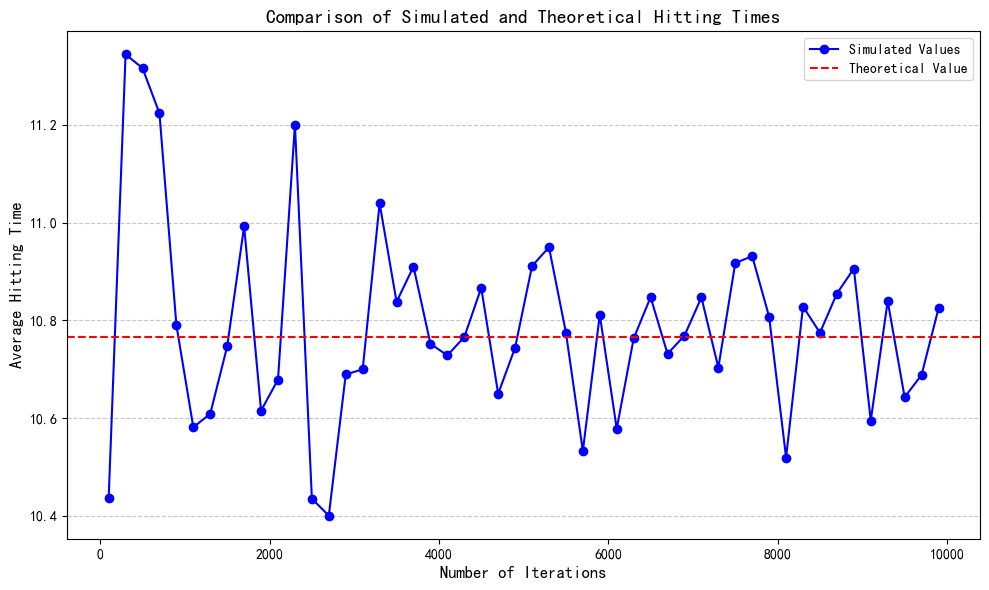

In [32]:
### Plot the simulation results and compare with the theoretical value
plt.figure(figsize=(10, 6))
plt.plot(num_simulations_list, simulation_value_list, label='Simulated Values', marker='o', linestyle='-', color='blue')
plt.axhline(y=E_o_T_d, color='red', linestyle='--', label='Theoretical Value')

# Add labels, legend, and title
plt.xlabel('Number of Iterations', fontsize=12)
plt.ylabel('Average Hitting Time', fontsize=12)
plt.title('Comparison of Simulated and Theoretical Hitting Times', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()